### Source Code for Project Cryptocurrency: Should I invest or are the markets cray

#### Importing Libraries
Consolidation of all library packages in use for code runs. This way imports only need to be ran once and can be used through the rest of the notebook, without slowing down runs by importing for each use.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas_datareader as pdr
import json
import requests
import urllib.request
import seaborn as sns
import cufflinks as cf
import plotly.offline as pylo
pylo.init_notebook_mode(connected=True)
from plotly.subplots import make_subplots
import plotly.graph_objects as go
# import libraries up front for use within notebook

#### Importing Data
* API used is LunarCrush at https://api.lunarcrush.com. After exploring different URLs with inline documentation on the website, the Assets category URL was determined to provide the most relevant data, as it included daily price and social media information.
* The URL was modified per API documentation to show daily changes for two years, as 720 data points is the maximum data points the API can support.
* URL is pulled into a URL dataframe and read via urllib.request library to view the data and check as first step that it includes required data points.

In [3]:
url = "https://api.lunarcrush.com/v2?data=assets&key=yukd41svc8pw3qq0rv0nvi&symbol=DOGE&data_points=720&interval=day&change=1d,2y"
urllib.request.urlopen(url).read() # read url data from API using unique token

b'{"config":{"change":"1d,2y","data":"assets","data_points":720,"interval":"day","symbol":"\'DOGE\'"},"usage":{"day":1,"month":23},"data":[{"id":29,"name":"Dogecoin","symbol":"DOGE","price":0.32544612,"price_btc":0.000006600494531326,"market_cap":42617175486,"percent_change_24h":0.52,"percent_change_7d":10.88,"percent_change_30d":69.68,"volume_24h":4779701434.64,"max_supply":"","timeSeries":[{"asset_id":29,"time":1567382400,"open":0.002612,"close":0.002587,"high":0.002657,"low":0.002559,"volume":16769667,"market_cap":null,"url_shares":1,"unique_url_shares":1,"reddit_posts":7,"reddit_posts_score":361,"reddit_comments":22,"reddit_comments_score":41,"tweets":529,"tweet_spam":171,"tweet_followers":null,"tweet_quotes":null,"tweet_retweets":null,"tweet_replies":null,"tweet_favorites":null,"tweet_sentiment1":2,"tweet_sentiment2":71,"tweet_sentiment3":65,"tweet_sentiment4":112,"tweet_sentiment5":112,"tweet_sentiment_impact1":2390,"tweet_sentiment_impact2":121110,"tweet_sentiment_impact3":21552

In [4]:
r = requests.get(url)
json = r.json() # turn API pull into pandas dataframe
json

{'config': {'change': '1d,2y',
  'data': 'assets',
  'data_points': '720',
  'interval': 'day',
  'symbol': "'DOGE'"},
 'usage': {'day': 2, 'month': 24},
 'data': [{'id': 29,
   'name': 'Dogecoin',
   'symbol': 'DOGE',
   'price': 0.32544612,
   'price_btc': 6.600494531326e-06,
   'market_cap': 42617175486,
   'percent_change_24h': 0.52,
   'percent_change_7d': 10.88,
   'percent_change_30d': 69.68,
   'volume_24h': 4779701434.64,
   'max_supply': '',
   'timeSeries': [{'asset_id': 29,
     'time': 1567382400,
     'open': 0.002612,
     'close': 0.002587,
     'high': 0.002657,
     'low': 0.002559,
     'volume': 16769667,
     'market_cap': None,
     'url_shares': 1,
     'unique_url_shares': 1,
     'reddit_posts': 7,
     'reddit_posts_score': 361,
     'reddit_comments': 22,
     'reddit_comments_score': 41,
     'tweets': 529,
     'tweet_spam': 171,
     'tweet_followers': None,
     'tweet_quotes': None,
     'tweet_retweets': None,
     'tweet_replies': None,
     'tweet_fav

#### Data Cleaning
* URL is then pulled into json dataframe using json and requests library to view it in a more user friendly format to see breakdown of lists and dictionaries within the data.
* Json keys and type functions are then called to get a better understanding of the different components of the data and to view what type of data is within the dataset, to better understand how and if we can transform it to be a useful dataset.
* It's identified that the key information is within the 'data' dictionary key and that the data is made up of dictionaries within a list
* Dataframe is run to view 'data' information for a closer look

In [5]:
json.keys()

dict_keys(['config', 'usage', 'data'])

In [6]:
type(json['config'])

dict

In [6]:
type(json['usage'])

dict

In [7]:
type(json['data'])

list

In [7]:
type(json['data'][0])

dict

In [8]:
json['data']

[{'id': 29,
  'name': 'Dogecoin',
  'symbol': 'DOGE',
  'price': 0.32544612,
  'price_btc': 6.600494531326e-06,
  'market_cap': 42617175486,
  'percent_change_24h': 0.52,
  'percent_change_7d': 10.88,
  'percent_change_30d': 69.68,
  'volume_24h': 4779701434.64,
  'max_supply': '',
  'timeSeries': [{'asset_id': 29,
    'time': 1567382400,
    'open': 0.002612,
    'close': 0.002587,
    'high': 0.002657,
    'low': 0.002559,
    'volume': 16769667,
    'market_cap': None,
    'url_shares': 1,
    'unique_url_shares': 1,
    'reddit_posts': 7,
    'reddit_posts_score': 361,
    'reddit_comments': 22,
    'reddit_comments_score': 41,
    'tweets': 529,
    'tweet_spam': 171,
    'tweet_followers': None,
    'tweet_quotes': None,
    'tweet_retweets': None,
    'tweet_replies': None,
    'tweet_favorites': None,
    'tweet_sentiment1': 2,
    'tweet_sentiment2': 71,
    'tweet_sentiment3': 65,
    'tweet_sentiment4': 112,
    'tweet_sentiment5': 112,
    'tweet_sentiment_impact1': 2390,
 

In [9]:
json['config']

{'change': '1d,2y',
 'data': 'assets',
 'data_points': '720',
 'interval': 'day',
 'symbol': "'DOGE'"}

#### Data Cleaning 
* New dataframe is created with just the list from the API pull that has our key information
* *Panic!* Why is there only one line? We are expecting daily data with multiple rows
* After reviewing our json['data'], it looks that more information is held within timeSeries, which is not shown on our latest dataframe
* Dataframe is sliced to view more columns and it shows the timeSeries cell has list with more data

In [9]:
doge_df = pd.DataFrame(json['data']) # create dataframe using key dataset within API data
doge_df

id      name symbol     price  price_btc   market_cap  percent_change_24h  \
0  29  Dogecoin   DOGE  0.325446   0.000007  42617175486                0.52   

   percent_change_7d  percent_change_30d    volume_24h  ...  \
0              10.88               69.68  4.779701e+09  ...   

  market_dominance_1d market_dominance_1d_previous  \
0            1.879555                     1.943011   

   market_dominance_1d_percent_change  close_2y  close_2y_percent_change  \
0                           -2.990088  0.325446             12144.022573   

   social_volume_global_2y  social_volume_global_2y_previous  \
0                364556868                            343160   

   market_dominance_2y  market_dominance_2y_previous  \
0             1.872374                          None   

   market_dominance_2y_percent_change  
0                                None  

[1 rows x 230 columns]

In [11]:
df1 = doge_df.iloc[:, 8:13] # slice dataframe to view column with underlying data
df1

percent_change_30d    volume_24h max_supply  \
0                84.2  5.844057e+09              

                                          timeSeries  \
0  [{'asset_id': 29, 'time': 1567209600, 'open': ...   

   social_dominance_calc_24h_previous  
0                                   0

#### Data Cleaning 
* New dataframe created to just pull the timeSeries column of data
* New dataframe created to use explode function to explode out the timeSeries dataframe, which pulls each dictionary as a new row
* Almost there, then we need to use the pandas normalize function to create a normalized dataframe, which has pulled out all our information into columns and rows

In [10]:
time_series_df = pd.DataFrame(doge_df['timeSeries']) # create dataframe for column with underlying data
time_series_df

timeSeries
0  [{'asset_id': 29, 'time': 1567382400, 'open': ...

In [11]:
ts_exp_df = time_series_df.explode('timeSeries') # explode the dataframe to break out into rows
ts_exp_df

timeSeries
0   {'asset_id': 29, 'time': 1567382400, 'open': 0...
0   {'asset_id': 29, 'time': 1567468800, 'open': 0...
0   {'asset_id': 29, 'time': 1567555200, 'open': 0...
0   {'asset_id': 29, 'time': 1567641600, 'open': 0...
0   {'asset_id': 29, 'time': 1567728000, 'open': 0...
..                                                ...
0   {'asset_id': 29, 'time': 1629158400, 'open': 0...
0   {'asset_id': 29, 'time': 1629244800, 'open': 0...
0   {'asset_id': 29, 'time': 1629331200, 'open': 0...
0   {'asset_id': 29, 'time': 1629417600, 'open': 0...
0   {'asset_id': 29, 'time': 1629504000, 'open': 0...

[720 rows x 1 columns]

In [12]:
normalized_df = pd.json_normalize(ts_exp_df['timeSeries']) 
normalized_df # normalize data into a readable dataset with columns and rows for further analysis

asset_id        time      open     close      high       low  \
0          29  1567382400  0.002612  0.002587  0.002657  0.002559   
1          29  1567468800  0.002647  0.002589  0.002660  0.002532   
2          29  1567555200  0.002577  0.002500  0.002601  0.002464   
3          29  1567641600  0.002527  0.002501  0.002551  0.002455   
4          29  1567728000  0.002410  0.002459  0.002504  0.002293   
..        ...         ...       ...       ...       ...       ...   
715        29  1629158400  0.320350  0.301837  0.340642  0.296508   
716        29  1629244800  0.301451  0.303447  0.326474  0.279348   
717        29  1629331200  0.303868  0.318106  0.320038  0.294873   
718        29  1629417600  0.317618  0.326851  0.334719  0.313884   
719        29  1629504000  0.327264  0.324917  0.329683  0.313915   

           volume    market_cap  url_shares  unique_url_shares  ...  medium  \
0    1.676967e+07           NaN         1.0                1.0  ...     NaN   
1    1.792577e+07           NaN         2.0                2.0  ...     NaN   
2    1.621235e+07           NaN         NaN                NaN  ...     NaN   
3    1.754551e+07           NaN         NaN                NaN  ...     NaN   
4    1.944170e+07           NaN         NaN                NaN  ...     NaN   
..            ...           ...         ...                ...  ...     ...   
715  8.205346e+09  4.140289e+10     13438.0             4757.0  ...     NaN   
716  9.398903e+09  3.865372e+10     14620.0             4887.0  ...     1.0   
717  5.994980e+09  4.063511e+10     15361.0             4609.0  ...     2.0   
718  5.191151e+09  4.207258e+10     11902.0             3776.0  ...     NaN   
719  1.185219e+09  4.290259e+10     12503.0             3640.0  ...     NaN   

     youtube  social_contributors  social_volume     price_btc  \
0        NaN                171.0            561  2.493632e-07   
1        NaN                207.0            639  2.441899e-07   
2        NaN                249.0            640  2.365786e-07   
3        NaN                264.0            598  2.360836e-07   
4        NaN                455.0            696  2.384594e-07   
..       ...                  ...            ...           ...   
715      2.0              47726.0          74949  6.737471e-06   
716      2.0              37136.0          68564  6.776891e-06   
717      NaN                  NaN          66122  6.795635e-06   
718      NaN                  NaN          69846  6.629252e-06   
719      NaN                  NaN          63032  6.605680e-06   

     social_volume_global  social_dominance  percent_change_24h  \
0                  120150          0.466916            4.525253   
1                  120085          0.532123            0.077310   
2                  113061          0.566066           -3.437621   
3                  117822          0.507545            0.040000   
4                   97221          0.715895           -1.679328   
..                    ...               ...                 ...   
715               1540749          4.864452           -5.851541   
716               1398855          4.901437            0.533467   
717               1262615          5.236909            4.830668   
718               1413955          4.939761            2.749252   
719               1402760          4.493427            0.520000   

     market_cap_global  market_dominance  
0                  NaN               NaN  
1                  NaN               NaN  
2                  NaN               NaN  
3                  NaN               NaN  
4                  NaN               NaN  
..                 ...               ...  
715       2.061616e+12          2.008274  
716       2.083856e+12          1.854914  
717       2.182438e+12          1.861914  
718       2.266393e+12          1.856367  
719       2.276104e+12          1.884913  

[720 rows x 60 columns]

#### Data Cleaning 
* Once the data is normalized, we check that it runs in a readable format with helpful data
* Time was not showing in a readable format, so we used pandas datetime function to convert to dates
* Data is then saved down to be captured as readable csv
* Data is scrutinized further to review what columns are NaN to see if there is any rebuilding of missing data necessary
  * List returned of all columns which contain NaN values
  * Iloc and describe functions are used to view statistical data for sliced subsets - as no averages were returned NaN, we can view that each column has data, there are just a number of columns that have no values for some rows
  * Social_score and volatility have some missing data which we can rebuild using averages, as there are only a few missing values

In [13]:
normalized_df['time'] = pd.to_datetime(normalized_df['time'], unit='s') # update date into readable format
normalized_df.head()

asset_id       time      open     close      high       low      volume  \
0        29 2019-09-02  0.002612  0.002587  0.002657  0.002559  16769667.0   
1        29 2019-09-03  0.002647  0.002589  0.002660  0.002532  17925768.0   
2        29 2019-09-04  0.002577  0.002500  0.002601  0.002464  16212352.0   
3        29 2019-09-05  0.002527  0.002501  0.002551  0.002455  17545511.0   
4        29 2019-09-06  0.002410  0.002459  0.002504  0.002293  19441699.0   

   market_cap  url_shares  unique_url_shares  ...  medium  youtube  \
0         NaN         1.0                1.0  ...     NaN      NaN   
1         NaN         2.0                2.0  ...     NaN      NaN   
2         NaN         NaN                NaN  ...     NaN      NaN   
3         NaN         NaN                NaN  ...     NaN      NaN   
4         NaN         NaN                NaN  ...     NaN      NaN   

   social_contributors  social_volume     price_btc  social_volume_global  \
0                171.0            561  2.493632e-07                120150   
1                207.0            639  2.441899e-07                120085   
2                249.0            640  2.365786e-07                113061   
3                264.0            598  2.360836e-07                117822   
4                455.0            696  2.384594e-07                 97221   

   social_dominance  percent_change_24h  market_cap_global  market_dominance  
0          0.466916            4.525253                NaN               NaN  
1          0.532123            0.077310                NaN               NaN  
2          0.566066           -3.437621                NaN               NaN  
3          0.507545            0.040000                NaN               NaN  
4          0.715895           -1.679328                NaN               NaN  

[5 rows x 60 columns]

In [14]:
normalized_df.to_csv('normalized_timeSeries1.csv',  date_format='%Y-%m-%d') # create csv

In [15]:
doge_data_csv = pd.read_csv("normalized_timeSeries.csv") # create dataframe to read csv

<span style='color:Blue'> Columns with NaN values:  </span>

In [16]:
[col for col in doge_data_csv.columns if doge_data_csv[col].isnull().any()] # determine columns with NaN values

['market_cap',
 'url_shares',
 'unique_url_shares',
 'reddit_posts',
 'reddit_posts_score',
 'reddit_comments',
 'reddit_comments_score',
 'tweets',
 'tweet_spam',
 'tweet_followers',
 'tweet_quotes',
 'tweet_retweets',
 'tweet_replies',
 'tweet_favorites',
 'tweet_sentiment1',
 'tweet_sentiment2',
 'tweet_sentiment3',
 'tweet_sentiment4',
 'tweet_sentiment5',
 'tweet_sentiment_impact1',
 'tweet_sentiment_impact2',
 'tweet_sentiment_impact3',
 'tweet_sentiment_impact4',
 'tweet_sentiment_impact5',
 'social_score',
 'average_sentiment',
 'sentiment_absolute',
 'sentiment_relative',
 'search_average',
 'news',
 'price_score',
 'social_impact_score',
 'correlation_rank',
 'galaxy_score',
 'volatility',
 'alt_rank',
 'alt_rank_30d',
 'alt_rank_hour_average',
 'market_cap_rank',
 'percent_change_24h_rank',
 'volume_24h_rank',
 'social_volume_24h_rank',
 'social_score_24h_rank',
 'medium',
 'youtube',
 'market_cap_global',
 'market_dominance']

<span style='color:Blue'> Number of NaN values per column:  </span> 

In [17]:
doge_data_csv['social_score'].isna().sum() # view number of cells within the column that are NaN

2

In [22]:
doge_data_csv['volatility'].isna().sum()

3

In [50]:
doge_data_csv['tweets'].isna().sum()

2

In [52]:
doge_data_csv['social_volume'].isna().sum()

0

In [18]:
doge_data_csv.iloc[:, 1:20].describe()  # describe slices of the dataframe to check for any columns that can't compute
                                        # and view key statistical information

asset_id        open       close        high         low        volume  \
count     720.0  720.000000  720.000000  720.000000  720.000000  7.200000e+02   
mean       29.0    0.060060    0.060588    0.065588    0.054761  2.295101e+09   
std         0.0    0.121786    0.122660    0.134258    0.109062  7.229223e+09   
min        29.0    0.001367    0.001530    0.001581    0.001317  1.067135e+07   
25%        29.0    0.002448    0.002456    0.002499    0.002385  4.056874e+07   
50%        29.0    0.002792    0.002774    0.002860    0.002692  1.167270e+08   
75%        29.0    0.050721    0.050738    0.054268    0.048096  1.344282e+09   
max        29.0    0.682515    0.683137    0.750131    0.597537  8.496596e+10   

         market_cap    url_shares  unique_url_shares  reddit_posts  \
count  7.040000e+02    712.000000         712.000000    709.000000   
mean   7.922749e+09   4272.692416        1778.720506    621.860367   
std    1.585009e+10   7435.621662        2819.548783   1223.459400   
min    1.944660e+08      1.000000           1.000000      3.000000   
25%    3.036591e+08    332.750000         194.750000     16.000000   
50%    3.535321e+08    632.000000         295.000000     26.000000   
75%    6.711908e+09   4143.000000        1986.000000    621.000000   
max    8.826116e+10  63979.000000       16154.000000   6576.000000   

       reddit_posts_score  reddit_comments  reddit_comments_score  \
count          709.000000       709.000000             709.000000   
mean         10978.069111      1207.303244            2551.064880   
std          19600.451476      2159.595731            4238.131938   
min             12.000000         2.000000               3.000000   
25%            207.000000        24.000000              59.000000   
50%            408.000000        40.000000             125.000000   
75%          17609.000000      1880.000000            5220.000000   
max         107254.000000     11621.000000           23076.000000   

             tweets     tweet_spam  tweet_followers  tweet_quotes  \
count  7.180000e+02     718.000000     7.060000e+02    706.000000   
mean   3.123460e+04   16279.247911     8.466030e+07    684.548159   
std    7.717501e+04   33810.723163     1.985754e+08   1999.597601   
min    2.100000e+02     125.000000     1.780830e+05      0.000000   
25%    7.192500e+02     548.750000     8.443505e+05      5.000000   
50%    1.471500e+03    1217.500000     1.558605e+06     26.000000   
75%    3.109350e+04   16637.500000     5.501384e+07    516.250000   
max    1.037338e+06  369284.000000     1.759507e+09  23044.000000   

       tweet_retweets  
count      706.000000  
mean     13124.967422  
std      36402.543600  
min          9.000000  
25%        139.250000  
50%        392.500000  
75%      11871.000000  
max     501844.000000

In [52]:
doge_data_csv.iloc[:, 21:40].describe()

tweet_favorites  tweet_sentiment1  tweet_sentiment2  tweet_sentiment3  \
count     7.060000e+02        716.000000        718.000000        718.000000   
mean      4.685804e+04        336.308659       3393.352368       5226.731198   
std       1.453587e+05        791.266503       8464.410377      13081.561104   
min       4.000000e+00          0.000000         13.000000         20.000000   
25%       2.005000e+02          3.000000         52.000000        138.250000   
50%       5.875000e+02          8.000000         93.500000        301.500000   
75%       3.707075e+04        226.000000       2984.750000       4935.250000   
max       2.076799e+06       6564.000000      90565.000000     186815.000000   

       tweet_sentiment4  tweet_sentiment5  tweet_sentiment_impact1  \
count        718.000000        718.000000             7.160000e+02   
mean       21324.394150        954.341226             3.459058e+06   
std        54181.809489       1917.300999             1.329775e+07   
min          107.000000          0.000000             0.000000e+00   
25%          418.500000         17.000000             1.119500e+03   
50%          935.000000         65.500000             8.203500e+03   
75%        21215.250000        544.750000             6.222930e+05   
max       759818.000000      12463.000000             1.766453e+08   

       tweet_sentiment_impact2  tweet_sentiment_impact3  \
count             7.180000e+02             7.180000e+02   
mean              1.418125e+07             1.304163e+07   
std               4.507465e+07             3.142921e+07   
min               5.391000e+03             1.477100e+04   
25%               5.796175e+04             1.681622e+05   
50%               1.542820e+05             3.519015e+05   
75%               7.388214e+06             8.098633e+06   
max               6.859630e+08             2.875762e+08   

       tweet_sentiment_impact4  tweet_sentiment_impact5  social_score  \
count             7.180000e+02             7.180000e+02  7.180000e+02   
mean              4.256423e+07             1.013052e+07  8.338438e+07   
std               1.042886e+08             2.222234e+07  1.974001e+08   
min               1.132720e+05             0.000000e+00  2.079350e+05   
25%               4.801488e+05             1.152625e+04  8.476045e+05   
50%               9.781215e+05             4.632550e+04  1.555024e+06   
75%               2.992249e+07             1.013651e+06  5.406904e+07   
max               9.988592e+08             1.168172e+08  1.761200e+09   

       average_sentiment  sentiment_absolute  sentiment_relative  \
count         718.000000               706.0          706.000000   
mean            3.621170                 3.0           86.383853   
std             0.146356                 0.0            5.707402   
min             3.100000                 3.0           56.000000   
25%             3.500000                 3.0           84.000000   
50%             3.600000                 3.0           87.000000   
75%             3.700000                 3.0           90.000000   
max             4.100000                 3.0           98.000000   

       search_average        news  price_score  social_impact_score  
count      240.000000  626.000000   705.000000           705.000000  
mean         3.079167   20.733227     3.018865             3.354610  
std         10.033312   32.440776     0.837745             0.436293  
min          0.000000    1.000000     1.000000             1.400000  
25%          0.000000    3.000000     2.700000             3.000000  
50%          0.000000    8.000000     3.000000             3.400000  
75%          0.000000   26.000000     3.300000             3.600000  
max         59.000000  244.000000     5.000000             5.000000

In [54]:
doge_data_csv.iloc[:, 41:61].describe()

galaxy_score  volatility    alt_rank  alt_rank_30d  \
count    705.000000  717.000000  690.000000    690.000000   
mean      65.541135    0.037150   60.627536     58.831884   
std        5.956555    0.078403   44.691058    122.704327   
min       44.500000    0.002333    1.000000      1.000000   
25%       62.000000    0.010025   25.000000     13.250000   
50%       65.000000    0.016266   52.000000     28.000000   
75%       69.000000    0.030507   85.750000     49.000000   
max       82.000000    0.764042  237.000000    862.000000   

       alt_rank_hour_average  market_cap_rank  percent_change_24h_rank  \
count             656.000000       685.000000               672.000000   
mean               71.168780        29.167883               890.543155   
std                39.996512        13.929212               410.579226   
min                 1.000000         4.000000                 5.000000   
25%                43.137500        17.000000               629.750000   
50%                67.290000        32.000000               900.000000   
75%                95.962500        35.000000              1132.000000   
max               244.710000        53.000000              2588.000000   

       volume_24h_rank  social_volume_24h_rank  social_score_24h_rank  \
count       672.000000              672.000000             672.000000   
mean         30.028274               16.709821              27.017857   
std          14.864638               15.404357              24.228230   
min           4.000000                1.000000               1.000000   
25%          18.000000                3.000000               3.000000   
50%          31.000000               15.000000              24.000000   
75%          41.000000               23.250000              43.000000   
max          64.000000               92.000000             113.000000   

          medium     youtube  social_contributors  social_volume  \
count  91.000000  235.000000           720.000000   7.200000e+02   
mean    1.835165    8.136170         14667.094444   3.472855e+04   
std     1.035629    8.470573         32115.210937   8.207196e+04   
min     1.000000    1.000000            76.000000   3.500000e+01   
25%     1.000000    2.000000           519.750000   9.860000e+02   
50%     2.000000    3.000000           986.000000   1.815500e+03   
75%     2.000000   14.500000         11140.000000   3.680600e+04   
max     6.000000   30.000000        330666.000000   1.070471e+06   

          price_btc  social_volume_global  social_dominance  \
count  7.200000e+02          7.200000e+02        720.000000   
mean   1.567494e-06          4.929087e+05          3.515295   
std    2.780980e-06          3.872204e+05          6.334746   
min    1.599555e-07          2.875000e+03          0.095012   
25%    2.608592e-07          2.411822e+05          0.427195   
50%    2.835229e-07          3.066055e+05          0.732969   
75%    9.890082e-07          7.201980e+05          4.765965   
max    1.191037e-05          2.236279e+06         59.679423   

       percent_change_24h  market_cap_global  market_dominance  
count          720.000000       7.040000e+02        704.000000  
mean             1.292987       7.390579e+11          0.505886  
std             16.641493       6.809164e+11          0.797812  
min            -38.815548       1.389236e+11          0.068991  
25%             -2.006615       2.471526e+11          0.113913  
50%             -0.069237       3.494372e+11          0.125109  
75%              1.955460       1.429533e+12          0.399965  
max            381.741233       2.630141e+12          3.656844

<span style='color:Blue'> Create copy of data to update:  </span> 

In [19]:
csv_copy = doge_data_csv.copy() # create a copy of database to use for updating data
csv_copy.head()

Unnamed: 0  asset_id        time      open     close      high       low  \
0           0        29  2019-08-26  0.002675  0.002636  0.002689  0.002621   
1           1        29  2019-08-27  0.002588  0.002606  0.002646  0.002559   
2           2        29  2019-08-28  0.002473  0.002504  0.002542  0.002431   
3           3        29  2019-08-29  0.002439  0.002436  0.002479  0.002375   
4           4        29  2019-08-30  0.002451  0.002458  0.002489  0.002420   

       volume  market_cap  url_shares  ...  medium  youtube  \
0  17679756.0         NaN         NaN  ...     NaN      NaN   
1  16696226.0         NaN         NaN  ...     NaN      NaN   
2  18244889.0         NaN         NaN  ...     NaN      NaN   
3  21965953.0         NaN         2.0  ...     NaN      NaN   
4  17545716.0         NaN         NaN  ...     NaN      NaN   

   social_contributors  social_volume     price_btc  social_volume_global  \
0                  189             35  2.537800e-07                  2875   
1                  152             38  2.565184e-07                  2943   
2                  304            618  2.573548e-07                114976   
3                  264            724  2.562201e-07                111577   
4                  203            542  2.562449e-07                 90535   

   social_dominance  percent_change_24h  market_cap_global  market_dominance  
0          1.217391            0.841622                NaN               NaN  
1          1.291199           -1.138088                NaN               NaN  
2          0.537503           -3.914045                NaN               NaN  
3          0.648879           -2.715655                NaN               NaN  
4          0.598664            0.903120                NaN               NaN  

[5 rows x 61 columns]

<span style='color:Blue'> Drop the additional index column created by the copy:  </span> 

In [20]:
csv_copy.drop(csv_copy.columns[0], axis=1, inplace=True) # drop Unnamed index column
csv_copy.head()

asset_id        time      open     close      high       low      volume  \
0        29  2019-08-26  0.002675  0.002636  0.002689  0.002621  17679756.0   
1        29  2019-08-27  0.002588  0.002606  0.002646  0.002559  16696226.0   
2        29  2019-08-28  0.002473  0.002504  0.002542  0.002431  18244889.0   
3        29  2019-08-29  0.002439  0.002436  0.002479  0.002375  21965953.0   
4        29  2019-08-30  0.002451  0.002458  0.002489  0.002420  17545716.0   

   market_cap  url_shares  unique_url_shares  ...  medium  youtube  \
0         NaN         NaN                NaN  ...     NaN      NaN   
1         NaN         NaN                NaN  ...     NaN      NaN   
2         NaN         NaN                NaN  ...     NaN      NaN   
3         NaN         2.0                2.0  ...     NaN      NaN   
4         NaN         NaN                NaN  ...     NaN      NaN   

   social_contributors  social_volume     price_btc  social_volume_global  \
0                  189             35  2.537800e-07                  2875   
1                  152             38  2.565184e-07                  2943   
2                  304            618  2.573548e-07                114976   
3                  264            724  2.562201e-07                111577   
4                  203            542  2.562449e-07                 90535   

   social_dominance  percent_change_24h  market_cap_global  market_dominance  
0          1.217391            0.841622                NaN               NaN  
1          1.291199           -1.138088                NaN               NaN  
2          0.537503           -3.914045                NaN               NaN  
3          0.648879           -2.715655                NaN               NaN  
4          0.598664            0.903120                NaN               NaN  

[5 rows x 60 columns]

<span style='color:Blue'> Using averages of following two day values to backfill missing data for 'social_score' and 'volatility':  </span> 
* This method is only used as there were few missing values and nearby averages are more appropriate than overall average for the column, given their measure type. For a larger NaN population, a different method would need to be selected which is more efficient and standardized.
* For 'tweets', there are two missing values which we want to fill as 0 to capture no tweets recorded in this time.

In [21]:
avg_idx = csv_copy['social_score'] # create dataframe to focus on social_score column for updating
avg_idx

0              NaN
1              NaN
2         982643.0
3        1681961.0
4         644466.0
          ...     
715    244572658.0
716    250359733.0
717    205082339.0
718    244527297.0
719    221105937.0
Name: social_score, Length: 720, dtype: float64

In [22]:
avg_idx_1 = avg_idx.iloc[2:4].mean() # find mean of following two cells
avg_idx_1

1332302.0

In [23]:
csv_copy.at[1, 'social_score']=1332302 # insert the mean into target cell

In [24]:
avg_idx_2 = avg_idx.iloc[1:3].mean().round()
avg_idx_2

1157472.0

In [43]:
csv_copy.at[0, 'social_score']=1157472 # verify that all fields are now filled
csv_copy['social_score'].iloc[0:10]

0    1157472.0
1    1332302.0
2     982643.0
3    1681961.0
4     644466.0
5     812978.0
6     978743.0
7     714933.0
8     801751.0
9    4256892.0
Name: social_score, dtype: float64

In [25]:
avg_vol = csv_copy.loc[:, ['volatility']].mean(axis=1)
avg_vol

0           NaN
1           NaN
2      0.764042
3      0.655401
4      0.493387
         ...   
715    0.027594
716    0.024780
717    0.033588
718    0.027829
719    0.029491
Length: 720, dtype: float64

In [26]:
avg_vol_1 = avg_vol.iloc[2:4].mean().round(decimals=8)
avg_vol_1

0.70972144

In [27]:
csv_copy.at[1, 'volatility']=0.70972144

In [28]:
avg_vol_2 = avg_vol.iloc[1:3].mean().round(decimals=8)
avg_vol_2

0.76404216

In [29]:
csv_copy.at[0, 'volatility']=0.76404216

In [30]:
avg_vol_3 = avg_vol.iloc[15:18].mean().round(decimals=8)
avg_vol_3

0.21495846

In [62]:
csv_copy.at[16, 'volatility']=0.21495846
csv_copy['volatility'].iloc[0:18]

0     0.764042
1     0.709721
2     0.764042
3     0.655401
4     0.493387
5     0.456029
6     0.412024
7     0.661793
8     0.498440
9     0.421023
10    0.445144
11    0.471125
12    0.447333
13    0.396299
14    0.356179
15    0.420929
16    0.214958
17    0.008988
Name: volatility, dtype: float64

In [31]:
csv_copy['tweets'].fillna(0, inplace=True) # fill NaN fields as 0 for missing fields in tweets column
csv_copy['tweets']

0          0.0
1          0.0
2        562.0
3        577.0
4        493.0
        ...   
715    65024.0
716    72553.0
717    62679.0
718    65712.0
719    84264.0
Name: tweets, Length: 720, dtype: float64

<span style='color:Blue'> Save the copy file with updated data to new csv file and create new dataframe to read new file:  </span> 

In [32]:
csv_copy.head()

asset_id        time      open     close      high       low      volume  \
0        29  2019-08-26  0.002675  0.002636  0.002689  0.002621  17679756.0   
1        29  2019-08-27  0.002588  0.002606  0.002646  0.002559  16696226.0   
2        29  2019-08-28  0.002473  0.002504  0.002542  0.002431  18244889.0   
3        29  2019-08-29  0.002439  0.002436  0.002479  0.002375  21965953.0   
4        29  2019-08-30  0.002451  0.002458  0.002489  0.002420  17545716.0   

   market_cap  url_shares  unique_url_shares  ...  medium  youtube  \
0         NaN         NaN                NaN  ...     NaN      NaN   
1         NaN         NaN                NaN  ...     NaN      NaN   
2         NaN         NaN                NaN  ...     NaN      NaN   
3         NaN         2.0                2.0  ...     NaN      NaN   
4         NaN         NaN                NaN  ...     NaN      NaN   

   social_contributors  social_volume     price_btc  social_volume_global  \
0                  189             35  2.537800e-07                  2875   
1                  152             38  2.565184e-07                  2943   
2                  304            618  2.573548e-07                114976   
3                  264            724  2.562201e-07                111577   
4                  203            542  2.562449e-07                 90535   

   social_dominance  percent_change_24h  market_cap_global  market_dominance  
0          1.217391            0.841622                NaN               NaN  
1          1.291199           -1.138088                NaN               NaN  
2          0.537503           -3.914045                NaN               NaN  
3          0.648879           -2.715655                NaN               NaN  
4          0.598664            0.903120                NaN               NaN  

[5 rows x 60 columns]

In [33]:
csv_copy.to_csv('clean_data2.csv',  date_format='%Y-%m-%d') # create new csv of the filled in dataframe

In [34]:
clean_doge_csv = pd.read_csv("clean_data.csv") # create dataframe to read this new csv

#### Definitions
Per LunarCrush Documentation
* Social Score: sum of followers, retweets, likes, reddit karma, etc of social posts collected
* Social Volume: number of social posts   
* Tweets: number of tweets collected   
* Volatility: degree of variation of a trading price series over time as measured by the standard deviation of logarithmic returns
* Close: end of day price

#### Data Visualization
<span style='color:Blue'> Visualize a comparison between the close price movement and the social score of Dogecoin. </span> Using matplotlib, graphs can show the trend of the price and social media engagement.

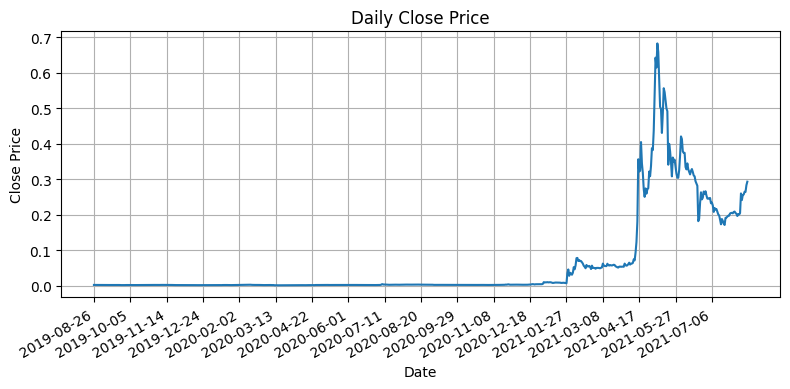

In [35]:
fig = plt.figure(figsize=(8,4), dpi=100) # line graph of daily close price

plt.plot(clean_doge_csv['time'],clean_doge_csv['close'])

plt.title('Daily Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(clean_doge_csv['time'].values[::40])

fig.autofmt_xdate()
plt.tight_layout()
plt.grid()

plt.show()

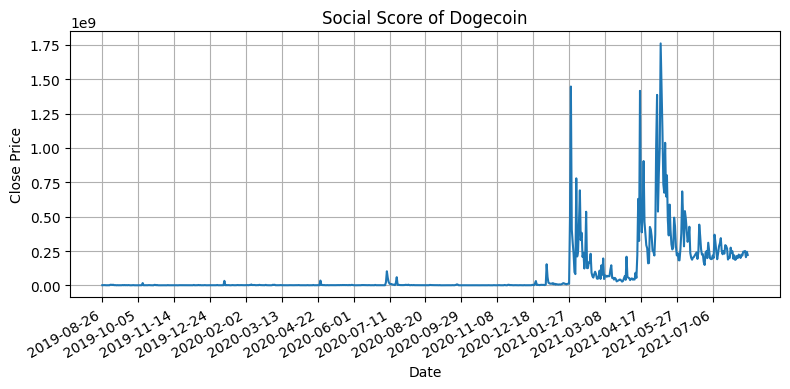

In [36]:
fig = plt.figure(figsize=(8,4), dpi=100) # line graph of social score

plt.plot(clean_doge_csv['time'],clean_doge_csv['social_score'])

plt.title('Social Score of Dogecoin')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(clean_doge_csv['time'].values[0::40])

fig.autofmt_xdate()
plt.tight_layout()
plt.grid()

plt.show()

#### Data Visualization
<span style='color:Blue'> Visualize how much the price fluctuates on a daily basis. </span> Using Plotly library to create an interactive graph in order to hover over line to view exact date, we will create another dataframe which drops unused column 'asset_id' and disregards the index when reading the dataframe.

In [37]:
clean_copy = clean_doge_csv.copy() # create a copy of latest csv to change index to time

In [38]:
clean_copy.drop(clean_copy.columns[0:2], axis=1, inplace=True) # drop Unnamed index and asset_id columns

In [39]:
clean_copy.head() # view updated dataframe

time      open     close      high       low      volume  market_cap  \
0  2019-08-26  0.002675  0.002636  0.002689  0.002621  17679756.0         NaN   
1  2019-08-27  0.002588  0.002606  0.002646  0.002559  16696226.0         NaN   
2  2019-08-28  0.002473  0.002504  0.002542  0.002431  18244889.0         NaN   
3  2019-08-29  0.002439  0.002436  0.002479  0.002375  21965953.0         NaN   
4  2019-08-30  0.002451  0.002458  0.002489  0.002420  17545716.0         NaN   

   url_shares  unique_url_shares  reddit_posts  ...  medium  youtube  \
0         NaN                NaN          12.0  ...     NaN      NaN   
1         NaN                NaN           7.0  ...     NaN      NaN   
2         NaN                NaN          23.0  ...     NaN      NaN   
3         2.0                2.0          15.0  ...     NaN      NaN   
4         NaN                NaN          19.0  ...     NaN      NaN   

   social_contributors  social_volume     price_btc  social_volume_global  \
0                  189             35  2.537800e-07                  2875   
1                  152             38  2.565184e-07                  2943   
2                  304            618  2.573548e-07                114976   
3                  264            724  2.562201e-07                111577   
4                  203            542  2.562449e-07                 90535   

   social_dominance  percent_change_24h  market_cap_global  market_dominance  
0          1.217391            0.841622                NaN               NaN  
1          1.291199           -1.138088                NaN               NaN  
2          0.537503           -3.914045                NaN               NaN  
3          0.648879           -2.715655                NaN               NaN  
4          0.598664            0.903120                NaN               NaN  

[5 rows x 59 columns]

In [42]:
doge_copy = clean_copy.to_csv('time_index1.csv',  date_format='%Y-%m-%d') # create new csv 

In [43]:
doge_copy = pd.read_csv("time_index.csv") # read new csv

In [44]:
doge_copy.set_index('time', inplace=True) # read time column as the index

In [45]:
doge_copy.head()

Unnamed: 0      open     close      high       low      volume  \
time                                                                         
2019-08-26           0  0.002675  0.002636  0.002689  0.002621  17679756.0   
2019-08-27           1  0.002588  0.002606  0.002646  0.002559  16696226.0   
2019-08-28           2  0.002473  0.002504  0.002542  0.002431  18244889.0   
2019-08-29           3  0.002439  0.002436  0.002479  0.002375  21965953.0   
2019-08-30           4  0.002451  0.002458  0.002489  0.002420  17545716.0   

            market_cap  url_shares  unique_url_shares  reddit_posts  ...  \
time                                                                 ...   
2019-08-26         NaN         NaN                NaN          12.0  ...   
2019-08-27         NaN         NaN                NaN           7.0  ...   
2019-08-28         NaN         NaN                NaN          23.0  ...   
2019-08-29         NaN         2.0                2.0          15.0  ...   
2019-08-30         NaN         NaN                NaN          19.0  ...   

            medium  youtube  social_contributors  social_volume     price_btc  \
time                                                                            
2019-08-26     NaN      NaN                  189             35  2.537800e-07   
2019-08-27     NaN      NaN                  152             38  2.565184e-07   
2019-08-28     NaN      NaN                  304            618  2.573548e-07   
2019-08-29     NaN      NaN                  264            724  2.562201e-07   
2019-08-30     NaN      NaN                  203            542  2.562449e-07   

            social_volume_global  social_dominance  percent_change_24h  \
time                                                                     
2019-08-26                  2875          1.217391            0.841622   
2019-08-27                  2943          1.291199           -1.138088   
2019-08-28                114976          0.537503           -3.914045   
2019-08-29                111577          0.648879           -2.715655   
2019-08-30                 90535          0.598664            0.903120   

            market_cap_global  market_dominance  
time                                             
2019-08-26                NaN               NaN  
2019-08-27                NaN               NaN  
2019-08-28                NaN               NaN  
2019-08-29                NaN               NaN  
2019-08-30                NaN               NaN  

[5 rows x 59 columns]

In [57]:
pylo.iplot(doge_copy['volatility'].iplot(asFigure=True, theme='white', title='Daily Volatility of Close Price',
                                             xTitle='Date', yTitle='Volatility', mode='lines',
                                             size=3.5, colors='blue'), image='png', filename='volatility')

# interactive graph for volatility
# degree of variation of a trading price series over time as measured by the standard deviation of logarithmic returns

#### Data Visualization
<span style='color:Blue'> A closer look a a time of high volatility. </span> Creating a new dataframe to take a closer look at January through July as it was a time of high volatility. Dataframe is sliced for this time period and plotly is used to compare the price to how volatile the price was at that time. A selection of tweets can also help put into context what is shown on the graph for spikes in volatility, including the end of January and beginning of May.

In [47]:
compare = doge_copy[['close','volatility']] # create dataframe for only close and volatility columns
compare.head()

close  volatility
time                            
2019-08-26  0.002636    0.764042
2019-08-27  0.002606    0.709721
2019-08-28  0.002504    0.764042
2019-08-29  0.002436    0.655401
2019-08-30  0.002458    0.493387

In [48]:
compare_df = compare.iloc[494:705] # slice dataframe to January 1 to July 31 2021
compare_df.head()

close  volatility
time                            
2021-01-01  0.005679    0.024019
2021-01-02  0.010460    0.176671
2021-01-03  0.009752    0.260018
2021-01-04  0.009802    0.122248
2021-01-05  0.009970    0.069834

In [56]:
pylo.iplot(compare_df.iplot(asFigure=True, theme='white', title='Daily Volatility vs Price',
                                             xTitle='Date', yTitle='Change in Volatility and Price', mode='lines',
                                             size=3.5), image='png', filename='vol_px')
# interactive graph to compare volatility and price

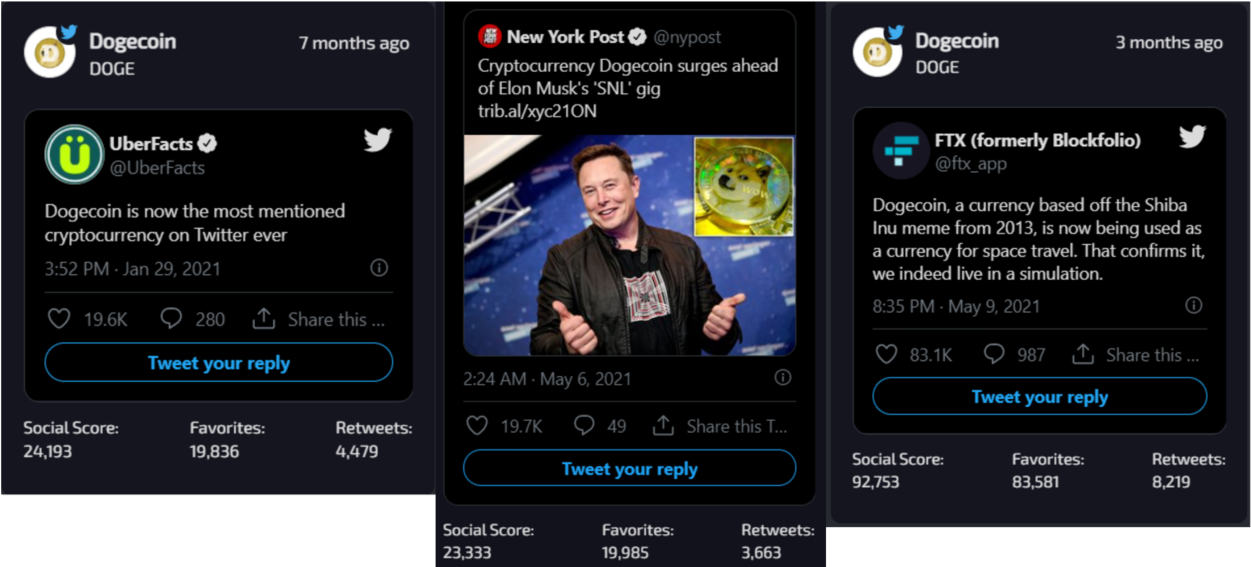

#### Data Visualization
<span style='color:Blue'> Using scatterplots to compare measures of change over time. </span> Using our dataframe which includes the index, plotly is used for subplots to review the change in price and social score activity.

In [58]:
scatter = clean_copy[['time','close','social_score', 'percent_change_24h']] 
scatter.head()   # new dataframe for cols using time as column instead of index

time     close  social_score  percent_change_24h
0  2019-08-26  0.002636     1157472.0            0.841622
1  2019-08-27  0.002606     1332302.0           -1.138088
2  2019-08-28  0.002504      982643.0           -3.914045
3  2019-08-29  0.002436     1681961.0           -2.715655
4  2019-08-30  0.002458      644466.0            0.903120

In [55]:
fig = make_subplots(rows=3, cols=1, subplot_titles=("Close Price", "Social Score", "Daily % Change in Price"))
fig.append_trace(go.Scatter(
    x=scatter['time'],
    y=scatter['close'],
    mode='markers', marker=dict(size=3)), 
    row=1, col=1,)

fig.append_trace(go.Scatter(
    x=scatter['time'],
    y=scatter['social_score'],
    mode='markers', marker=dict(size=3)),
    row=2, col=1)

fig.append_trace(go.Scatter(
    x=scatter['time'],
    y=scatter['percent_change_24h'],
    mode='markers', marker=dict(size=3)),
    row=3, col=1)

# subplots for scatterplot comparison
fig.update_layout(height=900, width=800, title_text="Change Comparisons", showlegend=False) 

#### Key Indicators - Correlation

* Social volume and tweets used in addition to social score as indicators of social media engagement for Dogecoin
* Heatmap used to view the correlation amongst categories, including tweets, social score, and social volume to close price

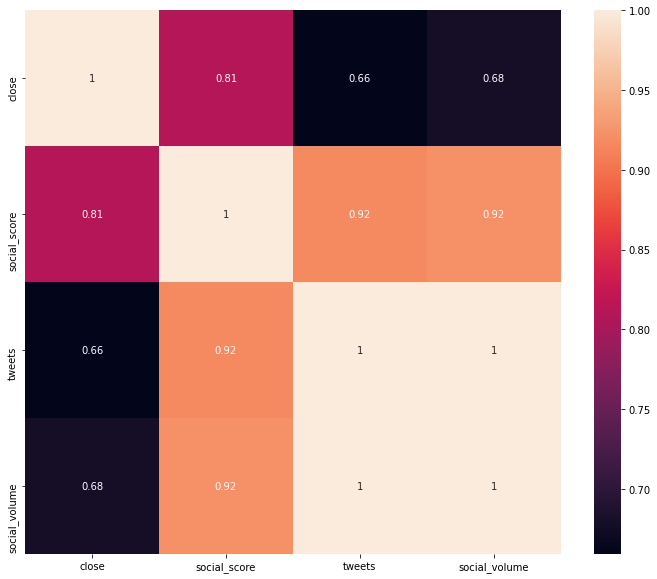

In [60]:
plt.figure(figsize=(12,10))
matrix = clean_doge_csv[['close','social_score','tweets','social_volume']].corr()
sns.heatmap(matrix, annot=True);
# heatmap shows relative correlation across columns
# correlation of 1 for same column and row cross comparison
# semicolon included at the end to remove axes suplot header

<span style='color:Blue'> All correlations can be considered moderate to strong or very strong, below table for relative correlation strength. </span> 

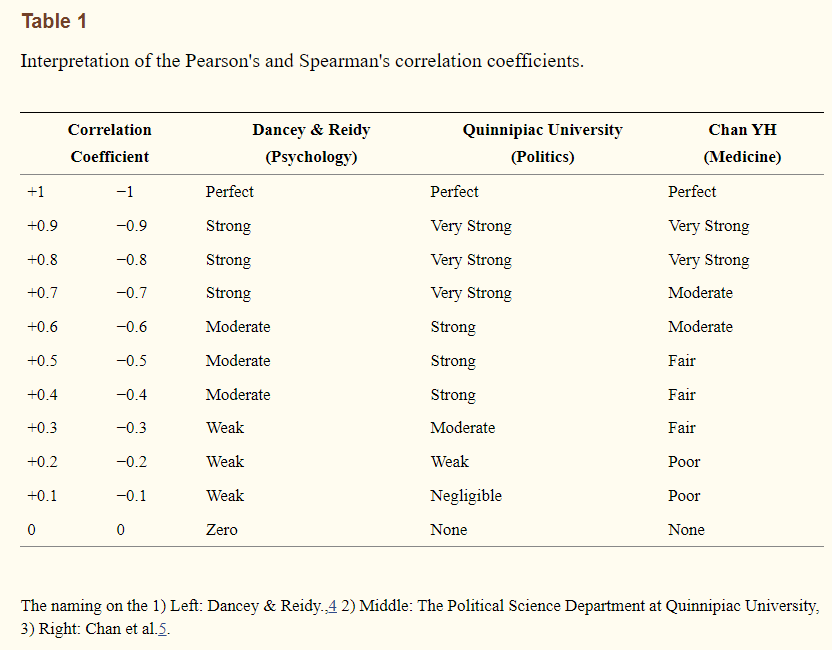